In [236]:
import json
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
from pyvis import network as net
import scipy

In [237]:
with open("../docs/data/human_inter.json",'r') as in_file:
    json_in = json.load(in_file)

In [238]:
all_data = []
for i in json_in['interactions']:
    all_data.append(("chr_" + str(i['chr1']) + "_" + str(i['pos1']) , "chr_" + str(i['chr2']) + "_" + str(i['pos2'])))

In [239]:
G = nx.Graph(all_data)
data = json_graph.node_link_data(G)
H = json_graph.node_link_graph(data)

In [224]:
import random
for i in all_data:
    H.add_edge(i[0], i[1],length= random.randint(0,10))
pos=nx.spring_layout(H)

In [225]:
# from random import randint

# for key,value in pos.items():
#     H.nodes[key]['viz'] = {'size': randint(0, 9)}
#     H.nodes[key]['viz']['position'] = {'x' : value[0], 'y' : value[1]}
#     H.nodes[key]['viz']['color'] = {'r' : 0, 'g' : 0, 'b' : 256}

In [226]:
# edges = H.edges
# for i in edges:
#     H.edges[i]['viz'] = {'thickness':randint(0, 9)}
#     H.edges[i]['viz'] = {'color':{'r' : randint(0, 256), 'g' : randint(0, 256), 'b' : randint(0, 256)}}

In [227]:
J = net.Network(notebook=True,height='1000px',width='1000px')
J.from_nx(H)
J.toggle_physics(True)
J.show_buttons(filter_=[ 'physics'])
J.show("mygraph.html")

In [228]:
a = list(nx.node_connected_component(H,'chr_1_5048')) #connected to chr_1_5048
b = list(dict(H.nodes()).keys()) #all nodes
c = [n for n in b if n not in a]  #not in connection with a

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


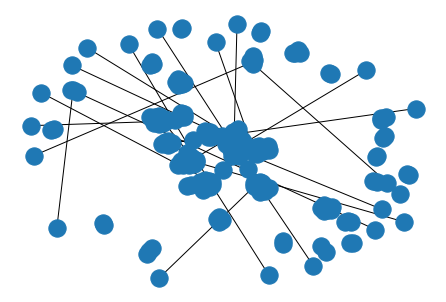

In [229]:
# H.remove_nodes_from(c)
# nx.draw(H)
# J = net.Network(notebook=True,height='1000px',width='1000px')
# J.from_nx(H)
# J.force_atlas_2based()
# J.toggle_physics(True)
# J.show_buttons(filter_=[ 'physics'])
# J.show("mygrap.html")
pos = nx.spring_layout(H)
nx.draw(H,pos)
# nx.draw_networkx_edge_labels(H, pos)
plt.show()

### Function to create gexf files used for visulaisation with sigmajs and also compatable with gephi

In [240]:
nx.write_gexf(H, "test.gexf")

In [241]:
nx.write_gml(H, "test.gml")

In [233]:
data = nx.cytoscape_data(H)

In [235]:
with open('test.json','w') as dump_json:
    json.dump(data,dump_json)

In [201]:
print(nx.info(H))
print("------------")
print("degree(total edges for node) of node 'chr_1_5048': " + str(nx.degree(H,'chr_1_5048')))


Name: 
Type: Graph
Number of nodes: 215
Number of edges: 193
Average degree:   1.7953
------------
degree(total edges for node) of node 'chr_1_5048': 21


In [113]:
A = nx.adjacency_matrix(H)
print(A.todense())

# A.setdiag(A.diagonal()*2)
# print(A.todense())

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


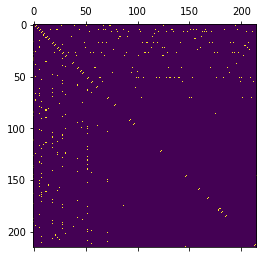

In [114]:
plt.matshow(A.todense())
plt.show()

In [117]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(H))
sorted(c[1])

['chr_10_2051',
 'chr_10_931',
 'chr_11_766',
 'chr_12_954',
 'chr_13_1216',
 'chr_14_1149',
 'chr_16_624',
 'chr_19_140',
 'chr_19_800',
 'chr_1_5048',
 'chr_3_112',
 'chr_3_1752',
 'chr_3_2992',
 'chr_3_632',
 'chr_3_692',
 'chr_4_3069',
 'chr_4_3829',
 'chr_5_438',
 'chr_5_718',
 'chr_8_2548']